In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn import metrics
import joblib
import datetime
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import time
import sys
sys.path.append("..")
from utils import model_and_dataset_selection

n_days_lookahead, data_type, data_folder_name_dict, model_type, model_folder_name_dict = model_and_dataset_selection.metrics_select_offline()
    
def loadData():

    X = np.load('../../data/' + data_folder_name_dict[data_type] + '/' + str(n_days_lookahead) + '_days_lookahead/smart_test.npy',allow_pickle=True)
    y = np.load('../../data/' + data_folder_name_dict[data_type] + '/' + str(n_days_lookahead) + '_days_lookahead/test_labels.npy', allow_pickle=True)

    X = X.astype('float32')
    y = y.astype('float32')
    return X.reshape((len(X),30,-1)), y

def get_all_metrics(true, predicted, score):
    confusion_matrix = metrics.confusion_matrix(true, predicted)
    fpr_list, tpr_list, thersholds = roc_curve(true, score)
    roc_auc = auc(fpr_list, tpr_list)
    TP = confusion_matrix[0][0]
    FN = confusion_matrix[0][1]
    FP = confusion_matrix[1][0]
    TN =  confusion_matrix[1][1]
    precision_of_failed = TP / (TP + FP)
    precision_of_healthy = TN / (TN + FN)
    tpr = TP / (TP + FN)
    fpr = FP / (TN + FP)
    auc_score = roc_auc
    f1_score = 2*precision_of_failed*tpr / (precision_of_failed+tpr)
    print('precision of failed: ', precision_of_failed)
    print('precision of healthy: ', precision_of_healthy)
    print('tpr: ', tpr)
    print('fpr: ', fpr)
    print('auc: ', auc_score)
    print('f1-score: ', f1_score)
    print('roc curve: ')
    plt.plot(fpr_list, tpr_list)
    plt.xlim([-0.05, 1.05])  
    plt.ylim([-0.05, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cuda


/usr/local/anaconda3/envs/gan-ada/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/anaconda3/envs/gan-ada/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/anaconda3/envs/gan-ada/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.1.2 when us

------------------ RF ------------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


precision of failed:  0.9268335375459479
precision of healthy:  0.6457171314741036
tpr:  0.4717849717849718
fpr:  0.037244943419762984
auc:  0.8851628182021125
f1-score:  0.6252829223169124
roc curve: 


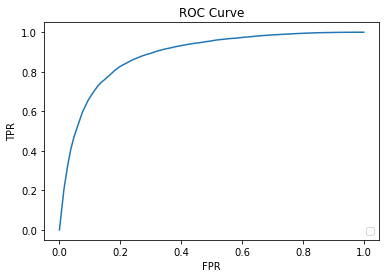

------------------ DT ------------------
precision of failed:  0.8775571990830846
precision of healthy:  0.697408295264372
tpr:  0.6026136026136026
fpr:  0.08408328135673765
auc:  0.7592651606284325
f1-score:  0.714549840643764
roc curve: 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


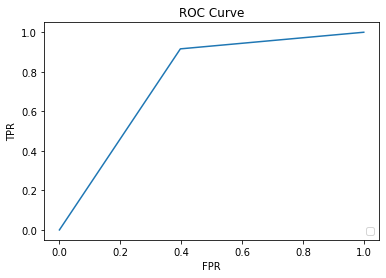

------------------ LR ------------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


precision of failed:  0.7988241308793456
precision of healthy:  0.5184227537168714
tpr:  0.09281259281259281
fpr:  0.023374617600760345
auc:  0.6747328671145832
f1-score:  0.16630301740194775
roc curve: 


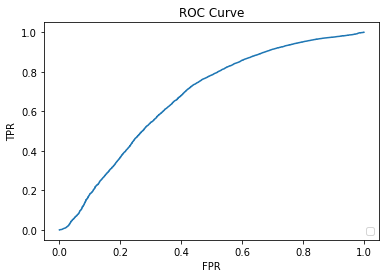

------------------ SVM ------------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


precision of failed:  0.9044178938594054
precision of healthy:  0.5228271101349231
tpr:  0.09667359667359668
fpr:  0.010217113665389528
auc:  0.7248594109059225
f1-score:  0.17467600418578444
roc curve: 


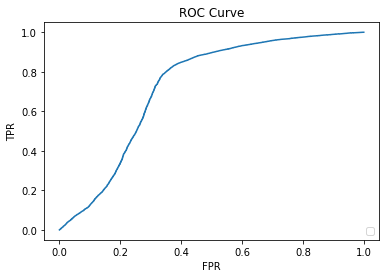

------------------ KNN ------------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


precision of failed:  0.8465947658194434
precision of healthy:  0.5849667159763313
tpr:  0.33338283338283337
fpr:  0.06041165463779738
auc:  0.7808004762696021
f1-score:  0.4783822369963136
roc curve: 


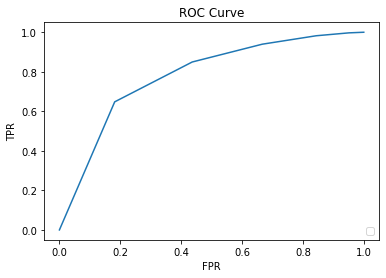

In [2]:
from sklearn.linear_model import LogisticRegression

rf = joblib.load('../../trained_model/' + model_folder_name_dict[model_type] + '/' + str(n_days_lookahead) + '_days_lookahead/rf.pkl')
knc = joblib.load('../../trained_model/' + model_folder_name_dict[model_type] + '/' + str(n_days_lookahead) + '_days_lookahead/knn.pkl')
lr = joblib.load('../../trained_model/' + model_folder_name_dict[model_type] + '/' + str(n_days_lookahead) + '_days_lookahead/lr.pkl')
dtc = joblib.load('../../trained_model/' + model_folder_name_dict[model_type] + '/' + str(n_days_lookahead) + '_days_lookahead/dt.pkl')
svc = joblib.load('../../trained_model/' + model_folder_name_dict[model_type] + '/' + str(n_days_lookahead) + '_days_lookahead/svm.pkl')

X_smart_test, y_smart_test = loadData()
print('------------------ RF ------------------')
y_pred = rf.predict(X_smart_test.reshape((len(X_smart_test),-1)))
y_pred_score = rf.predict_proba(X_smart_test.reshape(((len(X_smart_test),-1))))[:,1]
get_all_metrics(y_smart_test, y_pred, y_pred_score)

print('------------------ DT ------------------')
y_pred = dtc.predict(X_smart_test.reshape((len(X_smart_test),-1)))
y_pred_score = dtc.predict_proba(X_smart_test.reshape((len(X_smart_test),-1)))[:,1]
get_all_metrics(y_smart_test, y_pred, y_pred_score)

print('------------------ LR ------------------')
y_pred_score = lr.predict(X_smart_test.reshape((len(X_smart_test),-1)))
y_pred = np.zeros_like(y_pred_score)
for i in range(0,len(y_pred_score)):
    y_pred[i] = 0 if y_pred_score[i] < 0.5 else 1
get_all_metrics(y_smart_test, y_pred, y_pred_score)

print('------------------ SVM ------------------')
y_pred = svc.predict(X_smart_test.reshape((len(X_smart_test),-1)))
y_pred_score = svc.predict_proba(X_smart_test.reshape((len(X_smart_test),-1)))[:,1]
get_all_metrics(y_smart_test, y_pred, y_pred_score)

print('------------------ KNN ------------------')
y_pred = knc.predict(X_smart_test.reshape((len(X_smart_test),-1)))
y_pred_score = knc.predict_proba(X_smart_test.reshape(((len(X_smart_test),-1))))[:,1]
get_all_metrics(y_smart_test, y_pred, y_pred_score)
